In [1]:
'''
Work
請結合前面的知識與程式碼，比較不同的 regularization 的組合對訓練的結果與影響：如 dropout, regularizers, batch-normalization 等
'''
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [22]:
'''

def build_mlp():
    """Code Here
    建立你的神經網路
    """
    return model
'''
from keras.layers import BatchNormalization
from keras.regularizers import l1, l2, l1_l2
from keras.layers import Dropout

"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128],drp_ratio=0.3, BATCH_SIZE=1024,l2_ratio=1e-5):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
           
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            
            x = Dropout(drp_ratio)(x)
    x = BatchNormalization()(x)
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [23]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE_EXP = [2, 16, 32, 128, 256]
MOMENTUM = 0.95
Dropout_EXP = 0.25

In [24]:
results = {}
"""
使用迴圈建立不同的帶不同  Batch_size 的模型並訓練
"""
for BATCH_SIZE in BATCH_SIZE_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with BATCH_SIZE = %f" % (BATCH_SIZE))
    model = build_mlp(input_shape=x_train.shape[1:],drp_ratio=Dropout_EXP)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "BATCH_SIZEt_EXP-%s" % str(BATCH_SIZE)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with BATCH_SIZE = 2.000000
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               

50000/50000 [==============================] - 281s 6ms/step - loss: 2.2984 - acc: 0.1157 - val_loss: 2.2784 - val_acc: 0.1223
Epoch 45/50
50000/50000 [==============================] - 282s 6ms/step - loss: 2.2980 - acc: 0.1146 - val_loss: 2.2809 - val_acc: 0.1157
Epoch 46/50
50000/50000 [==============================] - 283s 6ms/step - loss: 2.2967 - acc: 0.1170 - val_loss: 2.2743 - val_acc: 0.1385
Epoch 47/50
50000/50000 [==============================] - 283s 6ms/step - loss: 2.2995 - acc: 0.1144 - val_loss: 2.2856 - val_acc: 0.1142
Epoch 48/50
50000/50000 [==============================] - 283s 6ms/step - loss: 2.2999 - acc: 0.1156 - val_loss: 2.2771 - val_acc: 0.1429
Epoch 49/50
50000/50000 [==============================] - 283s 6ms/step - loss: 2.2996 - acc: 0.1140 - val_loss: 2.2798 - val_acc: 0.1342
Epoch 50/50
50000/50000 [==============================] - 282s 6ms/step - loss: 2.2990 - acc: 0.1140 - val_loss: 2.2802 - val_acc: 0.1500
Experiment with BATCH_SIZE = 16.000000


50000/50000 [==============================] - 50s 1ms/step - loss: 1.3854 - acc: 0.5135 - val_loss: 1.3697 - val_acc: 0.5085
Epoch 42/50
50000/50000 [==============================] - 47s 938us/step - loss: 1.3770 - acc: 0.5155 - val_loss: 1.3755 - val_acc: 0.5111
Epoch 43/50
50000/50000 [==============================] - 47s 940us/step - loss: 1.3698 - acc: 0.5185 - val_loss: 1.3600 - val_acc: 0.5156
Epoch 44/50
50000/50000 [==============================] - 47s 946us/step - loss: 1.3641 - acc: 0.5184 - val_loss: 1.3590 - val_acc: 0.5224
Epoch 45/50
50000/50000 [==============================] - 48s 953us/step - loss: 1.3596 - acc: 0.5221 - val_loss: 1.3607 - val_acc: 0.5212
Epoch 46/50
50000/50000 [==============================] - 48s 951us/step - loss: 1.3525 - acc: 0.5256 - val_loss: 1.3478 - val_acc: 0.5168
Epoch 47/50
50000/50000 [==============================] - 48s 966us/step - loss: 1.3485 - acc: 0.5271 - val_loss: 1.3425 - val_acc: 0.5205
Epoch 48/50
50000/50000 [=========

50000/50000 [==============================] - 28s 557us/step - loss: 1.3464 - acc: 0.5218 - val_loss: 1.3282 - val_acc: 0.5248
Epoch 39/50
50000/50000 [==============================] - 28s 559us/step - loss: 1.3358 - acc: 0.5253 - val_loss: 1.3611 - val_acc: 0.5192
Epoch 40/50
50000/50000 [==============================] - 28s 562us/step - loss: 1.3313 - acc: 0.5257 - val_loss: 1.3255 - val_acc: 0.5237
Epoch 41/50
50000/50000 [==============================] - 28s 558us/step - loss: 1.3286 - acc: 0.5249 - val_loss: 1.3189 - val_acc: 0.5287
Epoch 42/50
50000/50000 [==============================] - 28s 562us/step - loss: 1.3203 - acc: 0.5318 - val_loss: 1.3127 - val_acc: 0.5231
Epoch 43/50
50000/50000 [==============================] - 28s 564us/step - loss: 1.3183 - acc: 0.5303 - val_loss: 1.3170 - val_acc: 0.5261
Epoch 44/50
50000/50000 [==============================] - 28s 566us/step - loss: 1.3121 - acc: 0.5340 - val_loss: 1.3080 - val_acc: 0.5305
Epoch 45/50
50000/50000 [=======

50000/50000 [==============================] - 14s 283us/step - loss: 1.3622 - acc: 0.5100 - val_loss: 1.3423 - val_acc: 0.5190
Epoch 36/50
50000/50000 [==============================] - 14s 285us/step - loss: 1.3604 - acc: 0.5102 - val_loss: 1.3426 - val_acc: 0.5215
Epoch 37/50
50000/50000 [==============================] - 14s 285us/step - loss: 1.3500 - acc: 0.5162 - val_loss: 1.3467 - val_acc: 0.5182
Epoch 38/50
50000/50000 [==============================] - 14s 283us/step - loss: 1.3466 - acc: 0.5182 - val_loss: 1.3518 - val_acc: 0.5152
Epoch 39/50
50000/50000 [==============================] - 14s 285us/step - loss: 1.3403 - acc: 0.5231 - val_loss: 1.3398 - val_acc: 0.5166
Epoch 40/50
50000/50000 [==============================] - 14s 287us/step - loss: 1.3344 - acc: 0.5214 - val_loss: 1.3373 - val_acc: 0.5230
Epoch 41/50
50000/50000 [==============================] - 14s 286us/step - loss: 1.3292 - acc: 0.5203 - val_loss: 1.3505 - val_acc: 0.5182
Epoch 42/50
50000/50000 [=======

50000/50000 [==============================] - 13s 252us/step - loss: 1.4203 - acc: 0.4884 - val_loss: 1.4030 - val_acc: 0.4926
Epoch 32/50
50000/50000 [==============================] - 12s 241us/step - loss: 1.4054 - acc: 0.4961 - val_loss: 1.4209 - val_acc: 0.4894
Epoch 33/50
50000/50000 [==============================] - 12s 232us/step - loss: 1.4038 - acc: 0.4952 - val_loss: 1.3812 - val_acc: 0.5086
Epoch 34/50
50000/50000 [==============================] - 11s 229us/step - loss: 1.3947 - acc: 0.4965 - val_loss: 1.3684 - val_acc: 0.5075
Epoch 35/50
50000/50000 [==============================] - 11s 230us/step - loss: 1.3877 - acc: 0.4999 - val_loss: 1.3891 - val_acc: 0.4978
Epoch 36/50
50000/50000 [==============================] - 12s 233us/step - loss: 1.3825 - acc: 0.5003 - val_loss: 1.3725 - val_acc: 0.5021
Epoch 37/50
50000/50000 [==============================] - 11s 228us/step - loss: 1.3776 - acc: 0.5033 - val_loss: 1.3720 - val_acc: 0.5029
Epoch 38/50
50000/50000 [=======

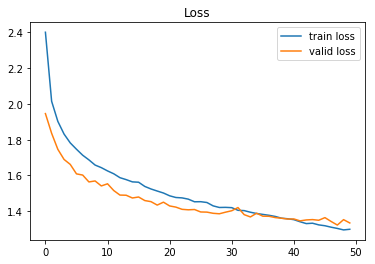

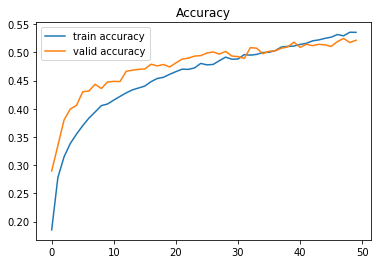

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()